In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean
import gsw

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Load files from monthly averages

### Calculate Salinity and Temperature at 0m

In [3]:

#years, months, data
monthly_array_0sal_slice = np.zeros([5,12,40,40])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(210,250)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_0sal_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [4]:
monthly_array_0sal_slice[monthly_array_0sal_slice == 0 ] = np.nan
monthly_array_0sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_0sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_0sal_slicemean))

(5, 12)


In [5]:
#years, months, data
monthly_array_0temp_slice = np.zeros([5,12,40,40])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(210,250)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_0temp_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [6]:
monthly_array_0temp_slice[monthly_array_0temp_slice == 0 ] = np.nan
monthly_array_0temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_0temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_0temp_slicemean))

(5, 12)


In [7]:
SurfaceDens=gsw.rho(monthly_array_0sal_slicemean,monthly_array_0temp_slicemean,0)

### Calculate Salinity and Temperature at 10 m

In [8]:

#years, months, data
monthly_array_10sal_slice = np.zeros([5,12,40,40])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(210,250)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=10, **slc).values
            q2 = q[0,:,:]
            monthly_array_10sal_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=10, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [9]:
monthly_array_10sal_slice[monthly_array_10sal_slice == 0 ] = np.nan
monthly_array_10sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_10sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_10sal_slicemean))

(5, 12)


In [10]:
#years, months, data
monthly_array_10temp_slice = np.zeros([5,12,40,40])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(210,250)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=10, **slc).values
            q2 = q[0,:,:]
            monthly_array_10temp_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=10, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [11]:
monthly_array_10temp_slice[monthly_array_10temp_slice == 0 ] = np.nan
monthly_array_10temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_10temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_10temp_slicemean))

(5, 12)


In [12]:
Dens_10m=gsw.rho(monthly_array_10sal_slicemean,monthly_array_10temp_slicemean,20)

In [13]:
Density_Diff_10=Dens_10m-SurfaceDens

In [14]:
Density_Diff_10

array([[0.21424901, 0.2435963 , 0.33161718, 0.35291075, 0.61306023,
        1.0396647 , 0.80064834, 0.73604001, 0.42412686, 0.36619293,
        0.19572801, 0.12897766],
       [0.16115719, 0.16734556, 0.18081855, 0.36468969, 0.60450032,
        0.67191987, 0.84001899, 0.83071957, 0.53651906, 0.26970987,
        0.14890135, 0.16926109],
       [0.19681328, 0.20852401, 0.1914138 , 0.21487452, 0.49452047,
        0.75716322, 0.93495632, 0.87991366, 0.62695259, 0.38407994,
        0.21414057, 0.19384745],
       [0.16845775, 0.17926886, 0.25519771, 0.2292118 , 0.57947232,
        0.93851349, 1.07615551, 0.80779615, 0.50289957, 0.41713373,
        0.20624627, 0.13479599],
       [0.15102479, 0.17465318, 0.2657927 , 0.28366277, 0.58744077,
        0.73801391, 0.70472366, 0.77689239, 0.48041794, 0.37537938,
        0.35059283, 0.25276504]])

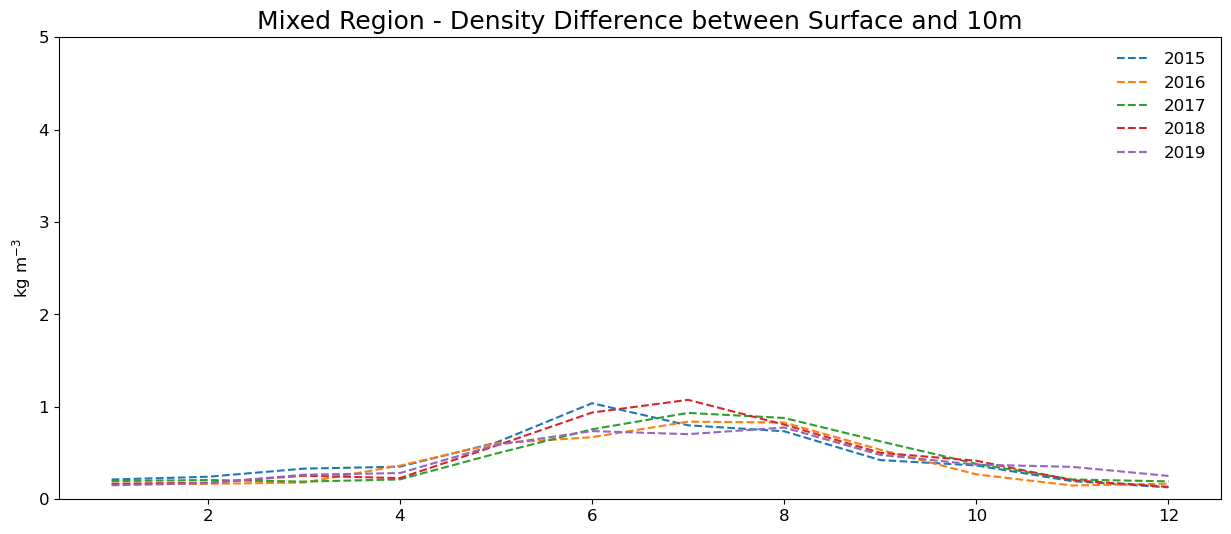

In [32]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

   
for i in range(0,5):
    ax.plot(np.arange(1,13), Density_Diff_10[i,:],linestyle='--',label=2015+i)
    ax.set_title('Mixed Region - Density Difference between Surface and 10m',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(0,5)
    ax.set_ylabel('kg m$^{-3}$')
    #ax.invert_yaxis()

### Calculate Salinity and Temperature at 25 m

In [16]:

#years, months, data
monthly_array_100sal_slice = np.zeros([5,12,40,40])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(210,250)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015,2020), ['vosaline']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015,2016,2017,2018,2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.vosaline.isel(deptht=27, **slc).values
            q2 = q[0,:,:]
            monthly_array_100sal_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['vosaline']:
                data[var].append(ds.vosaline.isel(deptht=27, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [17]:
monthly_array_100sal_slice[monthly_array_100sal_slice == 0 ] = np.nan
monthly_array_100sal_slicemean = \
np.nanmean(np.nanmean(monthly_array_100sal_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_100sal_slicemean))

(5, 12)


/tmp/ipykernel_1129834/3333534496.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_100sal_slice, axis = 2),axis = 2)


In [18]:
#years, months, data
monthly_array_100temp_slice = np.zeros([5,12,40,40])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(280,320), 'x': slice(210,250)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2020), ['votemper']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


# Loop through years
for year in [2015, 2016, 2017, 2018, 2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=27, **slc).values
            q2 = q[0,:,:]
            monthly_array_100temp_slice[year-2015,month-1,:,:] = q2 #year2007 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=27, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)


    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [19]:
monthly_array_100temp_slice[monthly_array_100temp_slice == 0 ] = np.nan
monthly_array_100temp_slicemean = \
np.nanmean(np.nanmean(monthly_array_100temp_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_100temp_slicemean))

(5, 12)


/tmp/ipykernel_1129834/72037692.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_100temp_slice, axis = 2),axis = 2)


In [20]:
Dens_100m=gsw.rho(monthly_array_100sal_slicemean,monthly_array_100temp_slicemean,100)

In [21]:
Density_Diff_100=Dens_100m-SurfaceDens

In [22]:
Density_Diff_100

array([[1.21276429, 1.34729888, 1.84822019, 2.06498403, 2.86266665,
        3.97050515, 3.58742422, 3.35801551, 2.28191912, 2.01918212,
        1.16877914, 0.87529067],
       [0.96794233, 0.95745872, 1.1516174 , 1.90836082, 3.01012548,
        3.0605432 , 3.45491751, 3.82886639, 2.72711836, 1.72157024,
        0.83680642, 1.0480252 ],
       [1.21997017, 1.23937761, 1.18720452, 1.24205051, 2.27298362,
        3.14452705, 3.80099912, 3.72866766, 3.0231909 , 2.13723768,
        1.27022697, 1.13869449],
       [0.93329273, 1.14320922, 1.48516239, 1.40490978, 2.42558885,
        3.42008263, 3.95610203, 3.36213789, 2.50522763, 2.29169854,
        1.27104215, 0.83703227],
       [0.87158739, 1.12219306, 1.46533777, 1.52540768, 2.61935152,
        3.06236259, 2.87224939, 3.11440099, 2.29494388, 2.12283289,
        1.94576649, 1.38594214]])

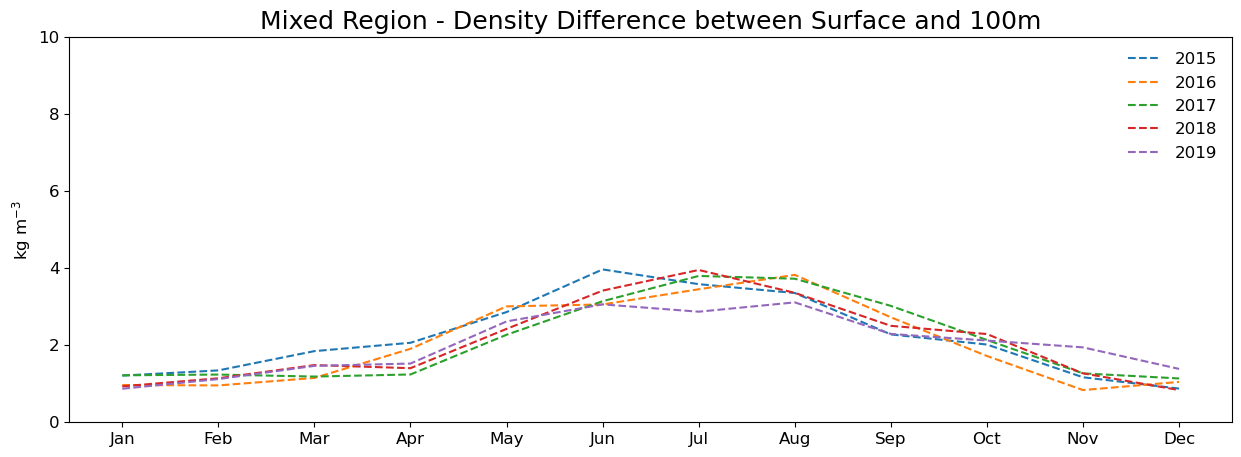

In [40]:
#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

for i in range(0,5):
    ax.plot(xticks, Density_Diff_100[i,:],linestyle='--',label=2015+i)
    ax.set_title('Mixed Region - Density Difference between Surface and 100m',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(0,10)
    ax.set_ylabel('kg m$^{-3}$')
    #ax.invert_yaxis()

In [39]:
Density_Diff_100[:,:].mean()

2.1018899033768377

In [37]:
Density_Diff_100[:,5].mean()

3.331604122459976

In [38]:
Density_Diff_100[:,6].mean()

3.5343384519206893